In [1]:
from camminapy import * 


Bad key "text.kerning_factor" on line 4 in
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def getmui(i,N):
    """See Lewis and Miller, p.160."""
    mu1  = 1 / np.sqrt(3*(N-1))
    if N == 2:
        return mu1
    else:
        C = 2.0*(1-3*mu1**2) /(N-2)
        return   (mu1**2 + C*(i-1))**0.5

mu_0 = 0.14907119849998599
mu_1 = 0.39440531887330776
mu_2 = 0.5374838498865699
mu_3 = 0.6497862896539309
mu_4 = 0.7453559924999299
mu_5 = 0.8299933065325822
mu_6 = 0.9067647005823629
mu_7 = 0.9775252199076787


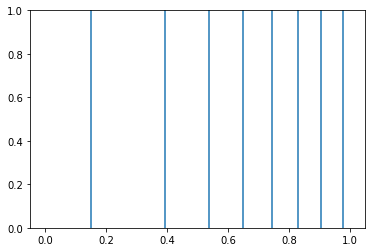

In [3]:
N = 16
mu = []
for i in range(1,N//2+1):
    mu.append(getmui(i,N))
fig, ax = plt.subplots()
for i,mui in enumerate(mu):
    ax.axvline(mui)
    print("mu_{} = {}".format(i,mui))
ax.set_xlim([-0.05,1.05]);

In [4]:
np.arccos(0.3500212)/np.sqrt(np.pi)

0.6844762649183547

In [5]:
for N in [2,4,6,8,12,16]:
    print(1/np.sqrt(3*(N-1)))

0.5773502691896258
0.3333333333333333
0.2581988897471611
0.2182178902359924
0.17407765595569785
0.14907119849998599


In [6]:
from quadrature import LevelSymmetricQuadrature
from camminapy import * 
from duplicate import duplicate

In [7]:
ls = LevelSymmetricQuadrature()

In [8]:
for nn in range(1,11):
    n = 2*nn
    lsn = ls.getQuadratureSet(n)
    x,y,z,w = lsn["mu"],lsn["eta"],lsn["xi"],lsn["weight"]
    X,Y,Z,W = duplicate(x,y,z,w)
    W = W/np.sum(W)*4*np.pi
    df = pd.DataFrame({"mu":Z,"eta":X,"xi":Y,"weight":W})

    df.to_csv("{}_levelsym.txt".format(n),index=False,header=False)

Generating level-symmetric quadrature with 4 angles
Generating level-symmetric quadrature with 12 angles
Generating level-symmetric quadrature with 24 angles
Generating level-symmetric quadrature with 40 angles
Generating level-symmetric quadrature with 60 angles
Generating level-symmetric quadrature with 84 angles
Generating level-symmetric quadrature with 112 angles
Generating level-symmetric quadrature with 144 angles
Generating level-symmetric quadrature with 180 angles
Generating level-symmetric quadrature with 220 angles


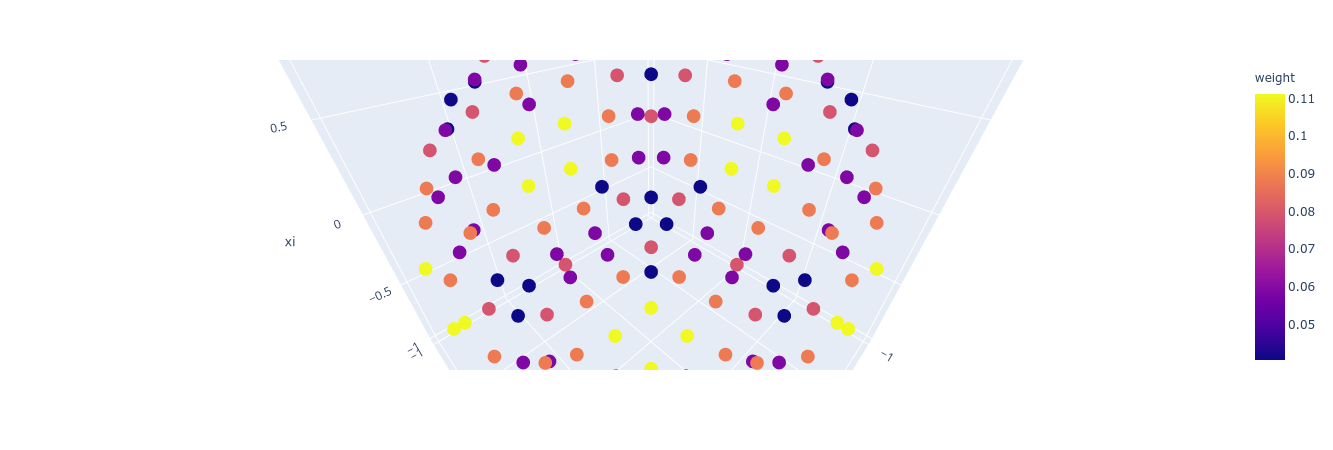

In [35]:
import plotly.express as px
fig = px.scatter_3d(df, x='mu', y='eta', z='xi',
              color='weight')
fig.show()